In [14]:
!pip install matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

You should consider upgrading via the '/workspace/DeepSpeech-2.x/tools/venv/bin/python -m pip install --upgrade pip' command.


In [15]:
from typing import Union
import torch
from torch.optim.lr_scheduler import _LRScheduler
from typeguard import check_argument_types


class WarmupLR(_LRScheduler):
    """The WarmupLR scheduler
    This scheduler is almost same as NoamLR Scheduler except for following
    difference:
    NoamLR:
        lr = optimizer.lr * model_size ** -0.5
             * min(step ** -0.5, step * warmup_step ** -1.5)
    WarmupLR:
        lr = optimizer.lr * warmup_step ** 0.5
             * min(step ** -0.5, step * warmup_step ** -1.5)
    Note that the maximum lr equals to optimizer.lr in this scheduler.
    """

    def __init__(
        self,
        optimizer: torch.optim.Optimizer,
        warmup_steps: Union[int, float] = 25000,
        last_epoch: int = -1,
    ):
        assert check_argument_types()
        self.warmup_steps = warmup_steps

        # __init__() must be invoked before setting field
        # because step() is also invoked in __init__()
        super().__init__(optimizer, last_epoch)

    def __repr__(self):
        return f"{self.__class__.__name__}(warmup_steps={self.warmup_steps})"

    def get_lr(self):
        step_num = self.last_epoch + 1
        return [
            lr
            * self.warmup_steps ** 0.5
            * min(step_num ** -0.5, step_num * self.warmup_steps ** -1.5)
            for lr in self.base_lrs
        ]

    def set_step(self, step: int):
        self.last_epoch = step

In [16]:
import torch.optim as optim
model = torch.nn.Linear(10, 200)
optimizer = optim.Adam(model.parameters())
scheduler = WarmupLR(optimizer, warmup_steps=25000)

In [17]:
infos = {}
start_epoch = infos.get('epoch', -1) + 1
cv_loss = infos.get('cv_loss', 0.0)
step = infos.get('step', -1)
print(start_epoch, cv_loss, step)

0 0.0 -1


In [31]:
print(step)
scheduler.set_step(step)

-1


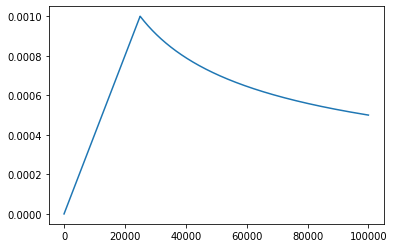

In [32]:
tot=100000
lrs=[]
for i in range(tot):
    scheduler.step()
    lrs.append(scheduler.get_lr())
xs = list(range(tot))
plt.plot(xs, lrs)

In [28]:
#paddle
from typing import Union
from paddle.optimizer.lr import LRScheduler
from typeguard import check_argument_types

class WarmupLR(LRScheduler):
    """The WarmupLR scheduler
    This scheduler is almost same as NoamLR Scheduler except for following
    difference:
    NoamLR:
        lr = optimizer.lr * model_size ** -0.5
             * min(step ** -0.5, step * warmup_step ** -1.5)
    WarmupLR:
        lr = optimizer.lr * warmup_step ** 0.5
             * min(step ** -0.5, step * warmup_step ** -1.5)
    Note that the maximum lr equals to optimizer.lr in this scheduler.
    """

    def __init__(self,
                 warmup_steps: Union[int, float]=25000,
                 learning_rate=1.0,
                 last_epoch=-1,
                 verbose=False):
        assert check_argument_types()
        self.warmup_steps = warmup_steps
        super().__init__(learning_rate, last_epoch, verbose)

    def __repr__(self):
        return f"{self.__class__.__name__}(warmup_steps={self.warmup_steps})"

    def get_lr(self):
        step_num = self.last_epoch + 1
        return self.base_lr * self.warmup_steps**0.5 * min(
            step_num**-0.5, step_num * self.warmup_steps**-1.5)

    def set_step(self, step: int):
        self.step(step)

-1


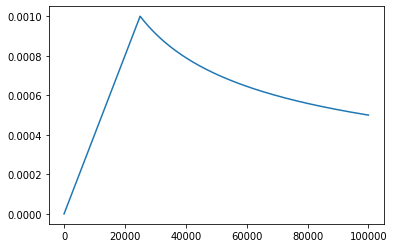

In [39]:
sc = WarmupLR(warmup_steps=25000, learning_rate=0.001)
print(step)
#sc.set_step(step)
sc.set_step(0)
lrs=[]
for i in range(tot):
    sc.step()
    lrs.append(sc.get_lr())
xs = list(range(tot))
plt.plot(xs, lrs)

-1


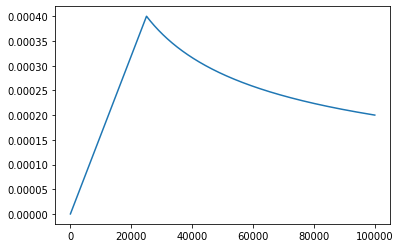

In [40]:
sc = WarmupLR(warmup_steps=25000, learning_rate=0.0004)
print(step)
#sc.set_step(step)
sc.set_step(0)
lrs=[]
for i in range(tot):
    sc.step()
    lrs.append(sc.get_lr())
xs = list(range(tot))
plt.plot(xs, lrs)

In [2]:
#paddle noam
import paddle
paddle.set_device('cpu')

CPUPlace

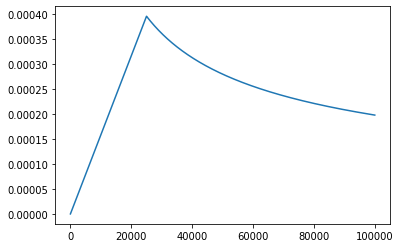

In [36]:
d_model=256
warmup_steps=25000
learning_rate=1
sc=paddle.optimizer.lr.NoamDecay(d_model, warmup_steps, learning_rate=learning_rate, last_epoch=- 1, verbose=False)
sc.step(0)
lrs=[]
for i in range(tot):
    sc.step()
    lrs.append(sc.get_lr())
xs = list(range(tot))
plt.plot(xs, lrs)

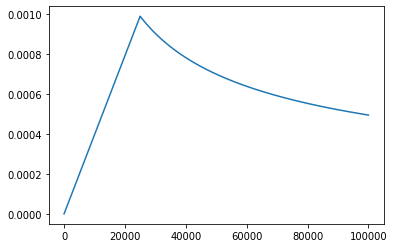

In [42]:
d_model=256
warmup_steps=25000
learning_rate=2.5
sc=paddle.optimizer.lr.NoamDecay(d_model, warmup_steps, learning_rate=learning_rate, last_epoch=- 1, verbose=False)
sc.step(0)
lrs=[]
for i in range(tot):
    sc.step()
    lrs.append(sc.get_lr())
xs = list(range(tot))
plt.plot(xs, lrs)